Our target is to get the degree 2 polynomials $H_i^L, H_i^C, H_i^R$ using $(i-2,i-1,i),(i-1,i,i+1), (i,i+1,i+2)$ respectively.

So, we create a function that generates symbolic polynomial like that. Basically, if we give $\{-1,0,1\}$ as the point, we would be creating a polynomial $H$ such that 
$$
\int_{-3/2}^{-1/2} H = f_{i-1}, \quad \int_{-1/2}^{1/2} H = f_{i}, \quad  \int_{1/2}^{3/2} H = f_{i+1}
$$
where $f_j$'s would also be symbolic. In general, a degree $k$ approximation would require inputs $\{i-j-k,\dots,i-j,\dots,i-j+k\}$. Then, we would enforce the condition, for each $l$ in these indices, 
$$
\int_{l-1/2}^{l+1/2} H = f_l
$$

We'd use the following sympy resources 

https://docs.sympy.org/latest/modules/integrals/integrals.html

https://medium.com/swlh/basics-of-solving-equations-in-sympy-ad770c14debd

https://stackoverflow.com/questions/25985338/solving-a-system-of-algebraic-equations-with-sympy

First, let's see whether we can successfully generate one symbolic equation out of 
$$
\int_{l-1/2}^{l+1/2} H = f_l.
$$

In [55]:
from sympy import *
import numpy as np

In [2]:

l = 2
init_printing(use_unicode=False, wrap_line=False)
xi  = Symbol('xi')
al = Symbol('a'+str(l))
integrand0 = al
bl = Symbol('b'+str(l))
bl = bl*xi
integrand0 += bl
cl = Symbol('c'+str(l))
cl = cl*(xi**2-1.0/12.0)
integrand0 += cl
integrate(integrand0,(xi,(l-1/2,l+1/2)))

The way we have written it, it appears that we have the freedom to write both the degree of approximation and the points in the function. However, the names of symbols `a,b,c` isn't good. Let's try to replace it with something else.

In [2]:
from sympy import *
l = 0
init_printing(use_unicode=False, wrap_line=False)
xi  = Symbol('xi')
sym = Symbol('a_{'+str(0)+','+str(l)+'}')
integrand0 = sym
sym = Symbol('a_{'+str(1)+','+str(l)+'}')
sym = sym*xi
integrand0 += sym
sym = Symbol('a_{'+str(2)+','+str(l)+'}')
sym = sym*(xi**2-1.0/12.0)
integrand0 += sym
integrate(integrand0,(xi,(l-1/2,l+1/2)))

Yes, this is exactly the abstraction we needed!
Now, we create a function that generates for degree $k$, the condition centred at $l$

In [19]:
def gen_condn(degree, centre):
    k = degree
    l = centre
    xi  = Symbol('xi')
    init_printing(use_unicode=False, wrap_line=False)
    integrand = 0*xi
    for i in range(0,k+1):
        sym = Symbol('a_{'+str(i)+','+str(l)+'}')
        sym = sym*xi**i
        integrand += sym
    lhs_condition = integrate(integrand,(xi,(l-1/2,l+1/2)))
    return integrand,lhs_condition

In [26]:
gen_condn(4,3)

Okay, we have successfuly built an algorithm that generates polynomials with symbolic coefficients in monomials. But, we want to do it in Legendre basis. So, we write them explicity.

In [20]:
import sys
def leg(degree,xi):
    n = degree
    if n==0:
        return 1.0 + xi*0.0
    elif n==1:
        return xi
    elif n==2:
        return xi**2-1.0/12.0
    elif n==3:
        return xi**3 - (3.0/20.0)*xi
    elif n==4:
        return xi**4 - (3.0/14.0)*xi**2 + (3.0/560.0)
    else:
        exit_message = "Degree "+str(n)+" Legendre polynomial not implemented"
        sys.exit(exit_message)

In [61]:
def gen_condn(degree, centre):
    def coeff_gen(expression):
        coefficients_output = np.zeros(degree+1)
        for i in range(0,degree+1):
            coefficients_output[i]=expression.coeff('a_'+str(i))
        return coefficients_output
    k = degree
    l = centre
    xi  = Symbol('xi')
    init_printing(use_unicode=False, wrap_line=False)
    integrand = 0*xi
    for i in range(0,k+1):
        sym = Symbol('a_'+str(i))
        sym = sym*leg(i,xi)
        integrand += sym
    lhs_condition = integrate(integrand,(xi,(l-1/2,l+1/2)))
    return coeff_gen(lhs_condition)

In [66]:
gen_condn(2,-1)

array([ 1., -1.,  1.])

We'd write a program that generates coefficients around centre of centres `coc`

If degree is odd, there is no centre of centres. So, the variable `coc` is one place to the right of where centre would be. 

In [303]:
def get_coeffs(degree,coc):
    k = degree
    if k%2==0:
        #centres are coc-k/2,...,coc+k/2
        centres = np.arange(start = coc-k/2,stop = coc+k/2+1)
    else:
        #centres are coc-(k-1)/2,...,coc+(k-1)/2
        centres = np.arange(start = coc-(k-1)/2-1,stop = coc + (k-1)/2+1)
    lhs = np.zeros([k+1,k+1])
    rhs = sympy.zeros(k+1,1)
    row_number = 0
    for centre in centres:
        lhs[row_number,:]=gen_condn(degree,centre)
        rhs[row_number,0] = Symbol('f_'+str(int(centre)))
        row_number += 1
    coeffs = np.linalg.inv(lhs)*rhs
    xi  = Symbol('xi')
    H = 0*xi
    init_printing(use_unicode=False, wrap_line=False)
    for i in range(0,k+1):
        H += coeffs[i]*leg(i,xi)
    return H

In [304]:
get_coeffs(2,-1)

In [76]:
a[1,:] = np.ones(2)

In [123]:
lhs = get_condns(2,0)

In [129]:
from sympy import Array

In [140]:
f0,f1,f2 = symbols('f_0'),symbols('f_1'),symbols('f_2')

In [173]:
import sympy
sympy.zeros(2,1)

[0]
[ ]
[0]

In [270]:
c1 = Symbol('c1')
c2 = Symbol('c2')
c3 = Symbol('c3')

In [299]:
lhs1,lhs2,lhs3 = get_coeffs(2,-1),get_coeffs(2,0),get_coeffs(2,1)

In [300]:
lhs = (c1*lhs1 + c2*lhs2+c3*lhs3).subs(xi,0.5)

In [281]:
sympy.srepr(lhs)

"Add(Mul(Symbol('c1'), Add(Mul(Integer(-1), Float('1.1666666666666667', precision=53), Symbol('f_-1')), Mul(Float('0.33333333333333337', precision=53), Symbol('f_-2')), Mul(Float('1.8333333333333333', precision=53), Symbol('f_0')))), Mul(Symbol('c2'), Add(Mul(Integer(-1), Float('0.16666666666666666', precision=53), Symbol('f_-1')), Mul(Float('0.83333333333333326', precision=53), Symbol('f_0')), Mul(Float('0.33333333333333337', precision=53), Symbol('f_1')))), Mul(Symbol('c3'), Add(Mul(Float('0.33333333333333337', precision=53), Symbol('f_0')), Mul(Float('0.83333333333333326', precision=53), Symbol('f_1')), Mul(Integer(-1), Float('0.16666666666666666', precision=53), Symbol('f_2')))))"

In [309]:
print(lhs.atoms(Symbol))

{f_1, c2, f_0, f_-1, c3, f_2, f_-2, c1}


In [289]:
rhs = get_coeffs(4,0)

In [226]:
from sympy import symbols, Eq, solve 
eqn = Eq(c1*lhs1.subs(xi,0.5)+c2*lhs2.subs(xi,0.5)+c3*lhs3.subs(xi,0.5),rhs.subs(xi,0.5))

In [227]:
eqn

Thus, $0.3333*c_1 = 0.03333f_{-2}, -0.16666*c_3 = -0.05*f_2$

In [268]:
c1 = 0.0333333333333333/0.333333333333333; c3 = -0.05/-0.166666666666667

In [231]:
eqn = Eq(c1*lhs1.subs(xi,0.5)+c2*lhs2.subs(xi,0.5)+c3*lhs3.subs(xi,0.5),rhs.subs(xi,0.5))

In [235]:
sym = solve(eqn,c2)

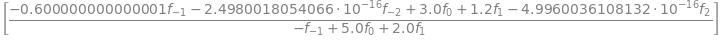

In [236]:
sym

In [269]:
print("c1,c2,c3 = ",c1, ",",c2,",",c3)

c1,c2,c3 =  0.1 , 0.6 , 0.29999999999999943


In [265]:
c3 = 0.3

Let's compare the two sides

In [266]:
(c1*lhs1+c2*lhs2+c3*lhs3).subs(xi,0.5)

In [267]:
rhs.subs(xi,0.5)

The way to do it generally would be to to teach it to compare coefficients and then solve the equations that come out of comparing coefficients. That isn't hard.